In [1]:
import pickle
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
ModCorDF = pickle.load(open("../computed_data/AffCor.pickle","rb"))
ModCorDF.sort_index(inplace=True)

ModAUCDF = pickle.load(open("../computed_data/AUCval.pickle","rb"))
ModAUCDF.sort_index(inplace=True)

ModEnrDF = pickle.load(open("../computed_data/EnrVal.pickle","rb"))
ModEnrDF.sort_index(inplace=True)

RobusValDF = pickle.load(open("../computed_data/RobusVal.pickle","rb"))
RobusValDF.sort_index(inplace=True)

AllConcatDF = pickle.load(open("../computed_data/ConcatBench.pk","rb"))
AllConcatDF.sort_index(inplace=True)


In [3]:
#Default color
new_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
              '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
              '#bcbd22', '#17becf']

In [4]:
#Relation between AUC and COR
ModToRun = ["FoldX","RosettabetaInterfacedGseparated","dTERMenC35"]
ModToRunName = ["FoldX","Rosetta","dTERMen"]
Receps = ["B2CL1","MCL1","B2LA1"]


#ModToRun = ["FoldX","RosettabetaInterfacedGseparated","dTERMenC35","STATIUM"]
#ModToRunName = ["FoldX","Rosetta","dTERMen","STATIUM"]
#Receps = ["B2CL1","MCL1","B2LA1"]

FoldX 0.25 0.7811421253528018
FoldX 0.75 0.46670405731625025
FoldX 1.5 0.461633488742337
FoldX 4.0 0.31430480602076055
RosettabetaInterfacedGseparated 0.25 0.6211066464651793
RosettabetaInterfacedGseparated 0.75 0.5925795349420644
RosettabetaInterfacedGseparated 1.5 0.3492984264679291
RosettabetaInterfacedGseparated 4.0 0.1951120092814154
dTERMenC35 0.25 0.9145077944443429
dTERMenC35 0.75 0.679585518367753
dTERMenC35 1.5 0.5524572633644623
dTERMenC35 4.0 0.23471699615170113


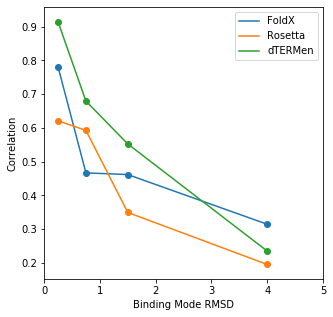

In [5]:
plt.figure(figsize=(5,5))

Bin = [0,0.5,1.0,2.0,6.0]

BelowOne = []
Thresh = 1.0
for (t,name,c) in zip(ModToRun,ModToRunName,new_colors):
    x = []
    y = []
    ind = RobusValDF["rmsd"].values < Thresh
    BelowOne.append(RobusValDF[t].values[ind])
    for i in range(1,len(Bin)):
        ind = (RobusValDF["rmsd"].values < Bin[i]) & (RobusValDF["rmsd"].values >= Bin[i-1])
        sub = RobusValDF[t].values[ind]
        xi = (Bin[i]+Bin[i-1])/2.0
        yi = np.nanmean(sub)
        ystd = np.nanstd(sub)
        plt.scatter(xi,yi,c=c)
        print(t,xi,yi)
        #plt.plot([xi,xi],[yi+ystd,yi-ystd],c=c)
        #plt.plot([xi-0.05,xi+0.05],[yi+ystd,yi+ystd],c=c)
        #plt.plot([xi-0.05,xi+0.05],[yi-ystd,yi-ystd],c=c)
        #plt.scatter((,np.mean(sub),c=c)
        
        x.append(xi)
        y.append(yi)
    plt.plot(x,y,c=c,label=name)
plt.xlabel("Binding Mode RMSD")    
plt.ylabel("Correlation")
plt.legend(loc=0)
plt.xlim([0,5])
plt.show()



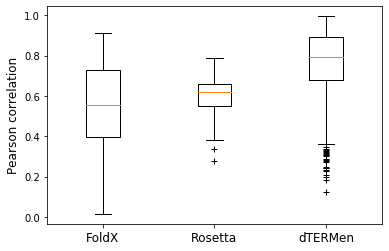

[0.54873138 0.60002139 0.74086959]
299


In [6]:
#Make figure for Plos Comp
BelowOneNoNaNMask = ~np.isnan(BelowOne)
BelowOneNoNaN = [d[m] for d, m in zip(BelowOne, BelowOneNoNaNMask)]

plt.boxplot(BelowOneNoNaN,sym='+')
plt.xticks(range(1,len(ModToRunName)+1),ModToRunName,size=12)
plt.ylabel("Pearson correlation",size=12)
plt.savefig("../Figures/Figure1.tiff",dpi=300,format="TIFF")
plt.show()
print(np.mean(BelowOneNoNaN,axis=1))
print(len(BelowOneNoNaN[0]))

In [7]:
RobusValDF.filter(regex="5C6H",axis=0)["rmsd"].describe()

count    418.000000
mean       0.657206
std        0.245282
min        0.213849
25%        0.541446
50%        0.664573
75%        0.736402
max        1.396146
Name: rmsd, dtype: float64

In [8]:
RobusValDF.filter(regex="5C6H",axis=0)["rmsd"].describe()

count    418.000000
mean       0.657206
std        0.245282
min        0.213849
25%        0.541446
50%        0.664573
75%        0.736402
max        1.396146
Name: rmsd, dtype: float64

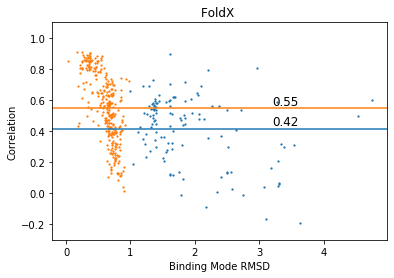

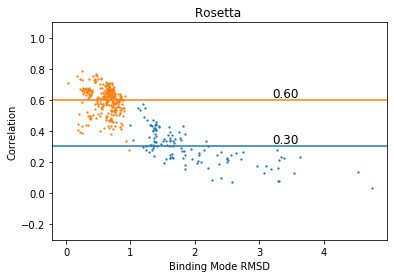

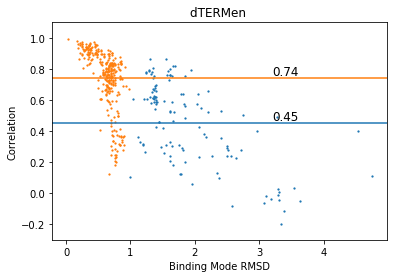

In [9]:

Thres = 1

for (t,name) in zip(ModToRun,ModToRunName):
    lowind = RobusValDF["rmsd"].values < Thres
    higind = RobusValDF["rmsd"].values >= Thres
    
    #Plot high
    plt.scatter(RobusValDF["rmsd"].values[higind],RobusValDF[t].values[higind],c=new_colors[0],s=1.5)
    #Plot low
    plt.scatter(RobusValDF["rmsd"].values[lowind],RobusValDF[t].values[lowind],c=new_colors[1],s=1.5)
    
    #Plot some line
    plt.axhline(np.nanmean(RobusValDF[t].values[higind]),c=new_colors[0])
    plt.axhline(np.nanmean(RobusValDF[t].values[lowind]),c=new_colors[1])
    
    #Plot text
    plt.text(3.2,np.nanmean(RobusValDF[t].values[higind])+0.02,"%.2f" % (np.nanmean(RobusValDF[t].values[higind])),size='large')
    plt.text(3.2,np.nanmean(RobusValDF[t].values[lowind])+0.02,"%.2f" % (np.nanmean(RobusValDF[t].values[lowind])),size='large')
    
    plt.ylim([-0.3,1.1])
    plt.title("%s " % (name))
    plt.xlabel("Binding Mode RMSD")
    plt.ylabel("Correlation")
    plt.show()


In [10]:
#Get average performance

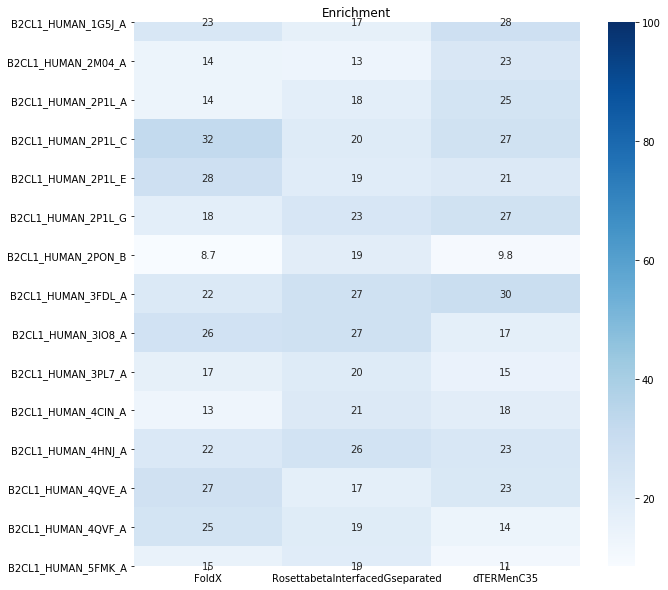

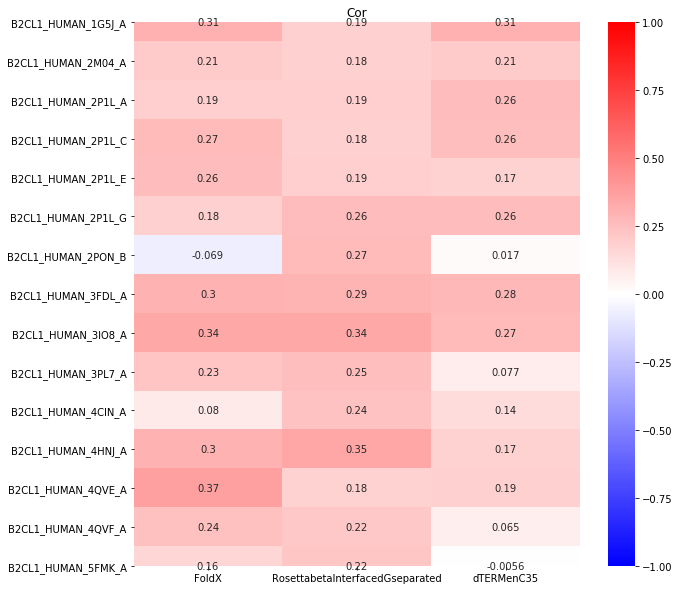

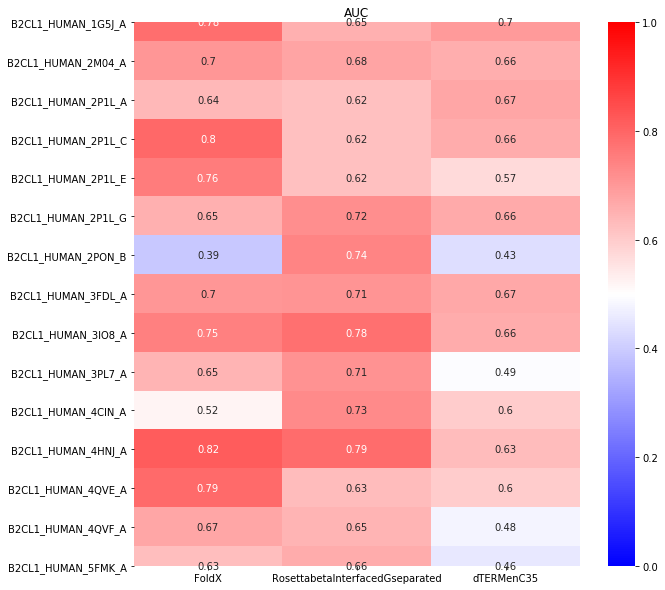

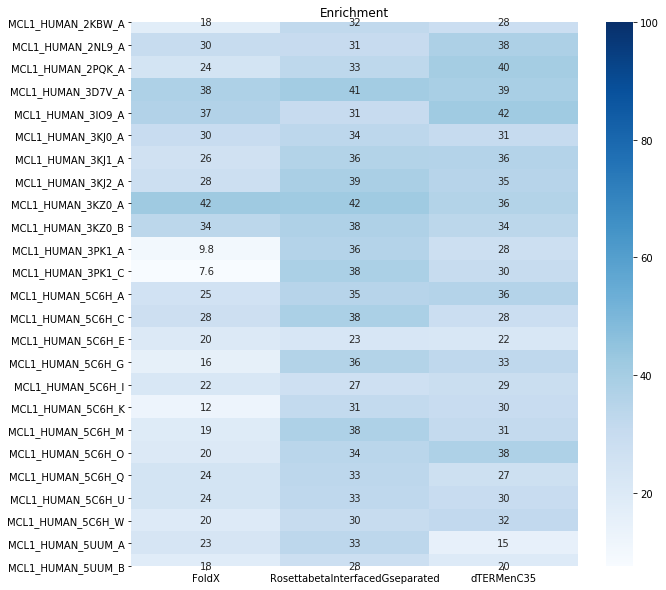

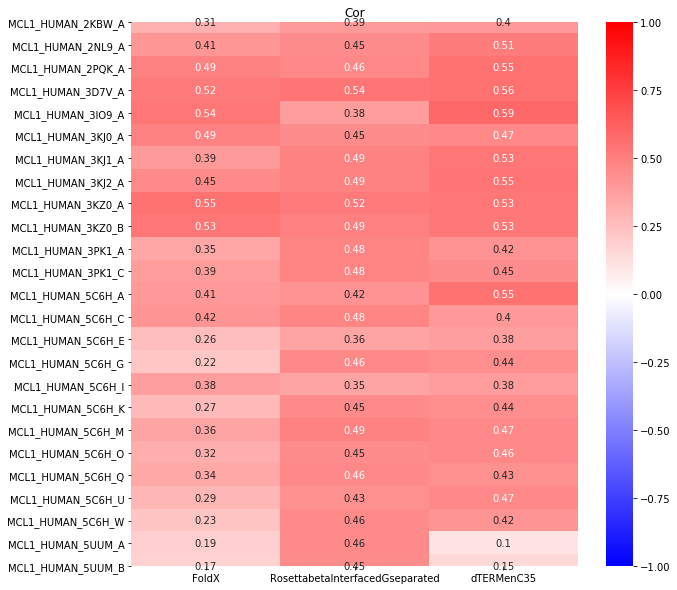

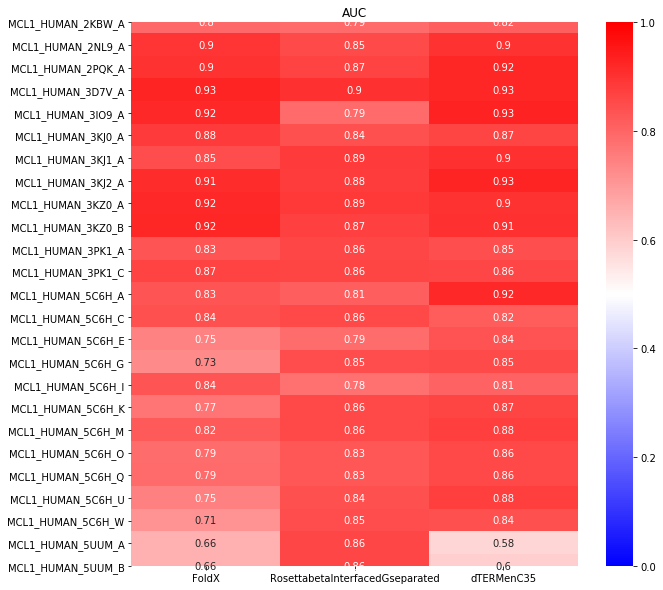

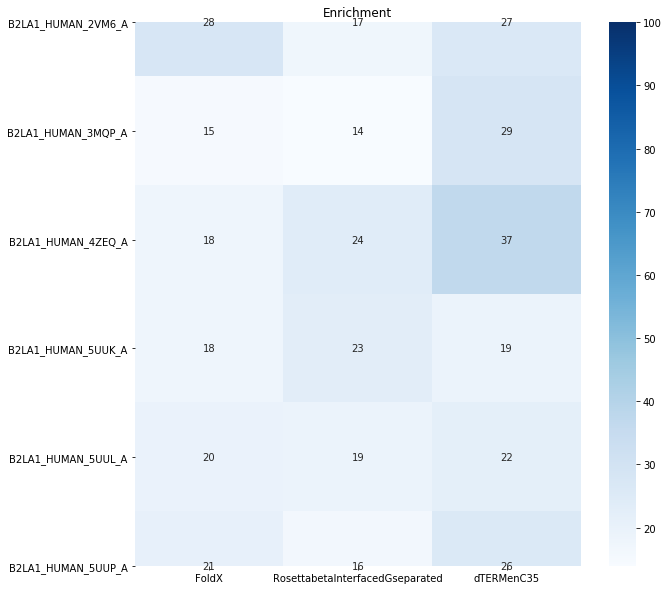

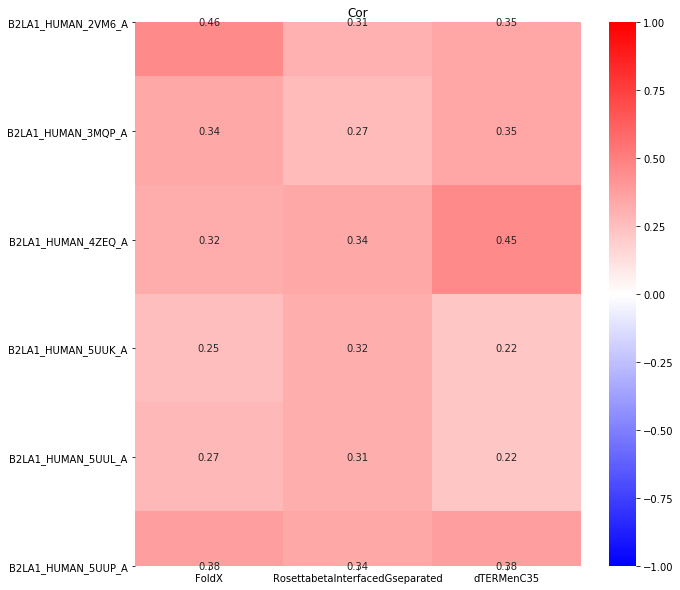

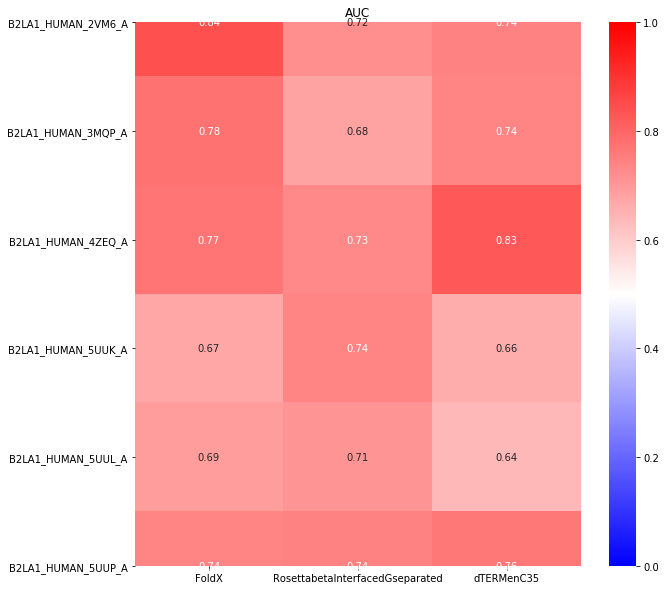

In [11]:
SummarPer = dict()
figsize(10,10)
for recep in Receps:
    AUCsubdf = ModAUCDF.filter(regex=recep+"_HUMAN_\d+",axis=0)
    CORsubdf = ModCorDF.filter(regex=recep+"_HUMAN_\d+",axis=0)
    ENRsubdf = ModEnrDF.filter(regex=recep+"_HUMAN_\d+",axis=0)
    
    #sns.heatmap(CORsubdf[ModToRun],cmap="seismic",center=0.0,vmin=-1.0,vmax=1.0,annot=True)
    #plt.show()
    sns.heatmap(ENRsubdf[ModToRun],cmap="Blues",vmax=100.0,annot=True)
    plt.title("Enrichment")
    plt.show()
    
    sns.heatmap(CORsubdf[ModToRun],cmap="bwr",vmax=1.0,vmin=-1.0,annot=True,center=0)
    plt.title("Cor")
    plt.show()
    
    sns.heatmap(AUCsubdf[ModToRun],cmap="bwr",vmax=1.0,vmin=0,annot=True,center=0.5)
    plt.title("AUC")
    plt.show()
    
    
    for (mod,name) in zip(ModToRun,ModToRunName):
        scor = np.corrcoef(AUCsubdf[mod],CORsubdf[mod])[0][1]
        if name+"_mean" not in SummarPer:
            SummarPer[name+"_mean"] = dict()
        SummarPer[name+"_mean"][recep+"_cor"] = np.mean(CORsubdf[mod])
        SummarPer[name+"_mean"][recep+"_AUC"] = np.mean(AUCsubdf[mod])
        SummarPer[name+"_mean"][recep+"_Enrich"] = np.mean(ENRsubdf[mod])
        
        SummarPer[name+"_mean"][recep+"_cor_sd"] = np.std(CORsubdf[mod])
        SummarPer[name+"_mean"][recep+"_AUC_sd"] = np.std(AUCsubdf[mod])
        SummarPer[name+"_mean"][recep+"_Enrich_sd"] = np.std(ENRsubdf[mod])
        
        
    AUCsubdf = ModAUCDF.filter(regex=recep+".*"+"MIN",axis=0)
    CORsubdf = ModCorDF.filter(regex=recep+".*"+"MIN",axis=0)
    ENRsubdf = ModEnrDF.filter(regex=recep+".*"+"MIN",axis=0)
    for (mod,name) in zip(ModToRun,ModToRunName):
        if name+"_min" not in SummarPer:
            SummarPer[name+"_min"] = dict()
        SummarPer[name+"_min"][recep+"_cor"] = np.mean(CORsubdf[mod])
        SummarPer[name+"_min"][recep+"_AUC"] = np.mean(AUCsubdf[mod])
        SummarPer[name+"_min"][recep+"_Enrich"] = np.mean(ENRsubdf[mod])
            


In [12]:
SummaryPerDF = pd.DataFrame(SummarPer).transpose()
SummaryPerDF["mean_AUC"] = SummaryPerDF.filter(regex="_AUC$").mean(axis=1)
SummaryPerDF["mean_cor"] = SummaryPerDF.filter(regex="_cor$").mean(axis=1)
SummaryPerDF["mean_Enrich"] = SummaryPerDF.filter(regex="_Enrich$").mean(axis=1)


SummaryPerDF["sd_AUC"] = SummaryPerDF.filter(regex="_AUC$").std(axis=1)
SummaryPerDF["sd_cor"] = SummaryPerDF.filter(regex="_cor$").std(axis=1)
SummaryPerDF["sd_Enrich"] = SummaryPerDF.filter(regex="_Enrich$").std(axis=1)

In [13]:
SummaryPerDF.to_csv("../computed_data/Summary.csv")

In [14]:
SummaryPerDF.filter(regex="mean_")

,mean_AUC,mean_cor,mean_Enrich
FoldX_mean,0.751714,0.311641,21.382945
Rosetta_mean,0.752156,0.335921,24.482307
dTERMen_mean,0.725712,0.318356,26.310226
FoldX_min,0.855653,0.471359,29.141456
Rosetta_min,0.783386,0.373168,26.112126
dTERMen_min,0.726089,0.325920,26.655962


In [15]:
SummaryPerDF.filter(regex="_Enrich$").filter(regex="mean",axis=0)

,B2CL1_Enrich,MCL1_Enrich,B2LA1_Enrich,mean_Enrich,sd_Enrich
FoldX_mean,20.322237,23.896682,19.929917,21.382945,1.784682
Rosetta_mean,20.448095,33.993213,19.005612,24.482307,6.750960
dTERMen_mean,20.778234,31.520819,26.631625,26.310226,4.391527


In [16]:
SummaryPerDF.filter(regex="mean_").filter(regex="_min",axis=0)

,mean_AUC,mean_cor,mean_Enrich
FoldX_min,0.855653,0.471359,29.141456
Rosetta_min,0.783386,0.373168,26.112126
dTERMen_min,0.726089,0.325920,26.655962


In [17]:
SummaryPerDF.filter(regex="_min",axis=0).filter(regex="_Enrich$")

,B2CL1_Enrich,MCL1_Enrich,B2LA1_Enrich,mean_Enrich,sd_Enrich
FoldX_min,27.359781,32.732131,27.332457,29.141456,2.539015
Rosetta_min,20.063839,38.298820,19.973719,26.112126,8.617372
dTERMen_min,14.135887,37.185482,28.646518,26.655962,9.514645


B2CL1 FoldX 0.22549564361774888 0.6837182624655856
B2CL1 RosettabetaInterfacedGseparated 0.23794665221952707 0.6881785163430983
B2CL1 dTERMenC35 0.17801743367671322 0.596668462520679
B2CL1 FoldX_MIN 0.38996079556195123 0.801427247366715
B2CL1 RosettabetaInterfacedGseparated_MIN 0.2502911579561749 0.7042399656657065
B2CL1 dTERMenC35_MIN 0.1433576512966144 0.5533402884628555
MCL1 FoldX 0.3711635674198435 0.8222256006006439
MCL1 RosettabetaInterfacedGseparated 0.4541255897906524 0.8472009229143866
MCL1 dTERMenC35 0.4478919319436433 0.8520413977556835
MCL1 FoldX_MIN 0.5608239598928684 0.9313250770393627
MCL1 RosettabetaInterfacedGseparated_MIN 0.5396404231590085 0.9192813535670679
MCL1 dTERMenC35_MIN 0.5090298578913082 0.8984347927205071
B2LA1 FoldX 0.3382651787182018 0.7491981507983079
B2LA1 RosettabetaInterfacedGseparated 0.315689784422947 0.7210898371761708
B2LA1 dTERMenC35 0.3291573571912825 0.7284264102250196
B2LA1 FoldX_MIN 0.46329287468929126 0.8342071824487194
B2LA1 RosettabetaInte

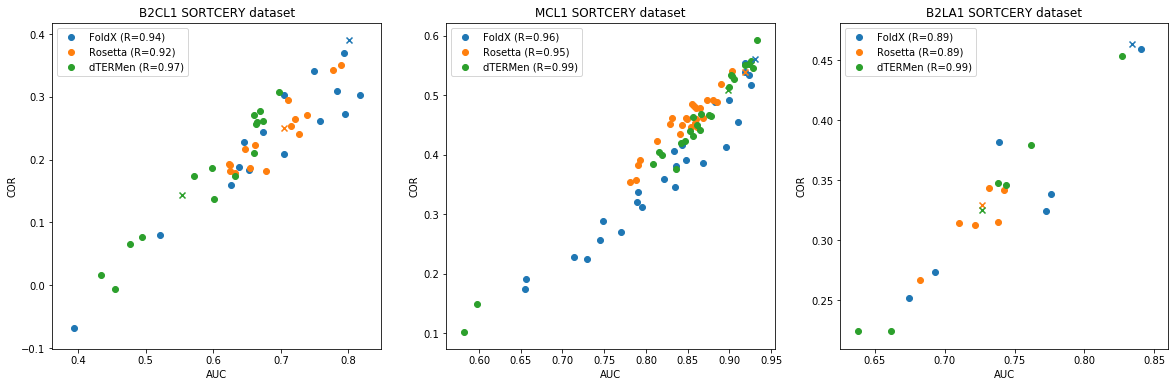

In [18]:
figsize(20,6)
plt.figure(1)
for recep in Receps:
    AUCsubdf = ModAUCDF.filter(regex=recep+"_HUMAN_\d+",axis=0)
    CORsubdf = ModCorDF.filter(regex=recep+"_HUMAN_\d+",axis=0)
    plt.subplot(1,3,Receps.index(recep)+1)
    for (mod,name,i) in zip(ModToRun,ModToRunName,range(len(ModToRun))):
        scor = np.corrcoef(AUCsubdf[mod],CORsubdf[mod])[0][1]
        plt.scatter(AUCsubdf[mod],CORsubdf[mod],label=name + " (R=%.2f)" % scor,c=new_colors[i])
        #plt.axhline(np.mean(CORsubdf[mod]))
        #plt.axvline(np.mean(AUCsubdf[mod]))
        print(recep,mod,np.mean(CORsubdf[mod]),np.mean(AUCsubdf[mod]))
    plt.legend(loc=2)
    AUCsubdf = ModAUCDF.filter(regex=recep+".*"+"MIN",axis=0)
    CORsubdf = ModCorDF.filter(regex=recep+".*"+"MIN",axis=0)
    for (mod,name,i) in zip(ModToRun,ModToRunName,range(len(ModToRun))):
        plt.scatter(AUCsubdf[mod],CORsubdf[mod],marker="x",c=new_colors[i])
        print(recep,mod+"_MIN",np.mean(CORsubdf[mod]),np.mean(AUCsubdf[mod]))
        
    plt.title(recep+" SORTCERY dataset")
   
    plt.xlabel("AUC")
    plt.ylabel("COR")
plt.show()

B2CL1 FoldX 20.32223742210062 0.6837182624655856
B2CL1 RosettabetaInterfacedGseparated 20.448095194323376 0.6881785163430983
B2CL1 dTERMenC35 20.778233774129806 0.596668462520679
B2CL1 FoldX_MIN 27.359781121751027 0.801427247366715
B2CL1 RosettabetaInterfacedGseparated_MIN 20.063839489284085 0.7042399656657065
B2CL1 dTERMenC35_MIN 14.135886912904697 0.5533402884628555
MCL1 FoldX 23.896682253395678 0.8222256006006439
MCL1 RosettabetaInterfacedGseparated 33.99321305721314 0.8472009229143866
MCL1 dTERMenC35 31.520819416610998 0.8520413977556835
MCL1 FoldX_MIN 32.73213092852371 0.9313250770393627
MCL1 RosettabetaInterfacedGseparated_MIN 38.298819861946114 0.9192813535670679
MCL1 dTERMenC35_MIN 37.18548207526163 0.8984347927205071
B2LA1 FoldX 19.929916776171705 0.7491981507983079
B2LA1 RosettabetaInterfacedGseparated 19.005612277287003 0.7210898371761708
B2LA1 dTERMenC35 26.63162505475252 0.7284264102250196
B2LA1 FoldX_MIN 27.33245729303548 0.8342071824487194
B2LA1 RosettabetaInterfacedGsep

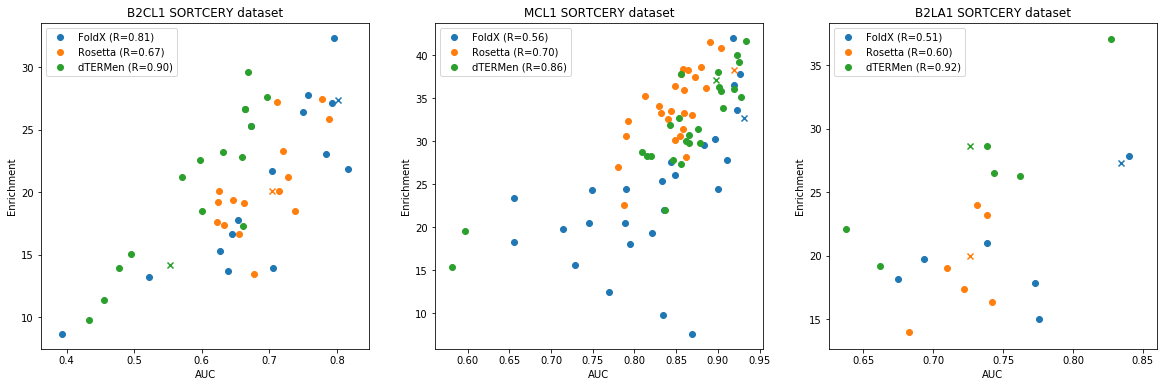

In [19]:
figsize(20,6)
plt.figure(1)
for recep in Receps:
    AUCsubdf = ModAUCDF.filter(regex=recep+"_HUMAN_\d+",axis=0)
    CORsubdf = ModEnrDF.filter(regex=recep+"_HUMAN_\d+",axis=0)
    plt.subplot(1,3,Receps.index(recep)+1)
    for (mod,name,i) in zip(ModToRun,ModToRunName,range(len(ModToRun))):
        scor = np.corrcoef(AUCsubdf[mod],CORsubdf[mod])[0][1]
        plt.scatter(AUCsubdf[mod],CORsubdf[mod],label=name + " (R=%.2f)" % scor,c=new_colors[i])
        #plt.axhline(np.mean(CORsubdf[mod]))
        #plt.axvline(np.mean(AUCsubdf[mod]))
        print(recep,mod,np.mean(CORsubdf[mod]),np.mean(AUCsubdf[mod]))
    plt.legend(loc=0)
    AUCsubdf = ModAUCDF.filter(regex=recep+".*"+"MIN",axis=0)
    CORsubdf = ModEnrDF.filter(regex=recep+".*"+"MIN",axis=0)
    for (mod,name,i) in zip(ModToRun,ModToRunName,range(len(ModToRun))):
        plt.scatter(AUCsubdf[mod],CORsubdf[mod],marker="x",c=new_colors[i])
        print(recep,mod+"_MIN",np.mean(CORsubdf[mod]),np.mean(AUCsubdf[mod]))
        
    plt.title(recep+" SORTCERY dataset")
   
    plt.xlabel("AUC")
    plt.ylabel("Enrichment")
plt.show()

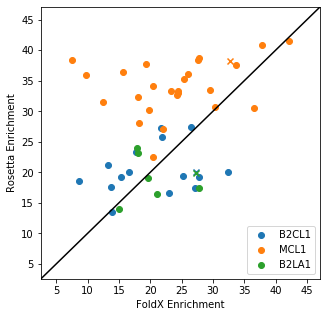

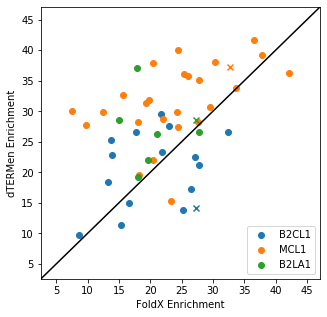

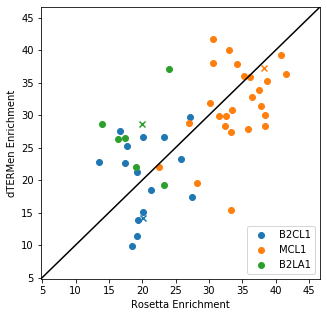

In [20]:
#Compare AUC
figsize(5,5)
for i in range(0,len(ModToRun)):
    for j in range(i+1,len(ModToRun)):
        alld = []
        allL = []
        for k in range(len(Receps)):
            recep = Receps[k]
            #AUCsubdf = ModEnrDF.filter(regex=recep+"_HUMAN_\d+",axis=0)
            AUCsubdf = ModEnrDF.filter(regex=recep+"_HUMAN_\d+",axis=0)
            Leg = plt.scatter(AUCsubdf[ModToRun[i]],AUCsubdf[ModToRun[j]],label=recep,c=new_colors[k])
            allL.append(Leg)
            alld += list(AUCsubdf[ModToRun[i]])
            alld += list(AUCsubdf[ModToRun[j]])
            
            AUCsubdf = ModEnrDF.filter(regex=recep+".*"+"MIN",axis=0)
            plt.scatter(AUCsubdf[ModToRun[i]],AUCsubdf[ModToRun[j]],marker="x",c=new_colors[k])
        plt.xlabel("%s Enrichment" % (ModToRunName[i]))
        plt.ylabel("%s Enrichment" % (ModToRunName[j]))
        
        minv = np.min(alld)-5
        maxv = np.max(alld)+5
        plt.xlim([minv,maxv])
        plt.ylim([minv,maxv])
        plt.plot([minv,maxv],[minv,maxv],c="black")
        plt.legend(handles=allL,loc=4)
        plt.show()

In [21]:
ToTest = ModEnrDF
ToTest = ModAUCDF
#ToTest = ModCorDF
for k in range(len(Receps)):
    recep = Receps[k]
    #AUCsubdf = ModEnrDF.filter(regex=recep+"_HUMAN_\d+",axis=0)
    AUCsubdf = ToTest.filter(regex=recep+"_HUMAN_\d+",axis=0)
    print(recep)
    print(AUCsubdf[ModToRun].idxmax(axis=1).value_counts())
    print()
print("ALL")
print(ToTest[ModToRun].idxmax(axis=1).value_counts())
print()

B2CL1
RosettabetaInterfacedGseparated    7
FoldX                              7
dTERMenC35                         1
dtype: int64

MCL1
dTERMenC35                         14
FoldX                               6
RosettabetaInterfacedGseparated     5
dtype: int64

B2LA1
RosettabetaInterfacedGseparated    2
FoldX                              2
dTERMenC35                         2
dtype: int64

ALL
FoldX                              18
dTERMenC35                         17
RosettabetaInterfacedGseparated    14
dtype: int64



In [22]:
#Relation between crystal resolution and performance

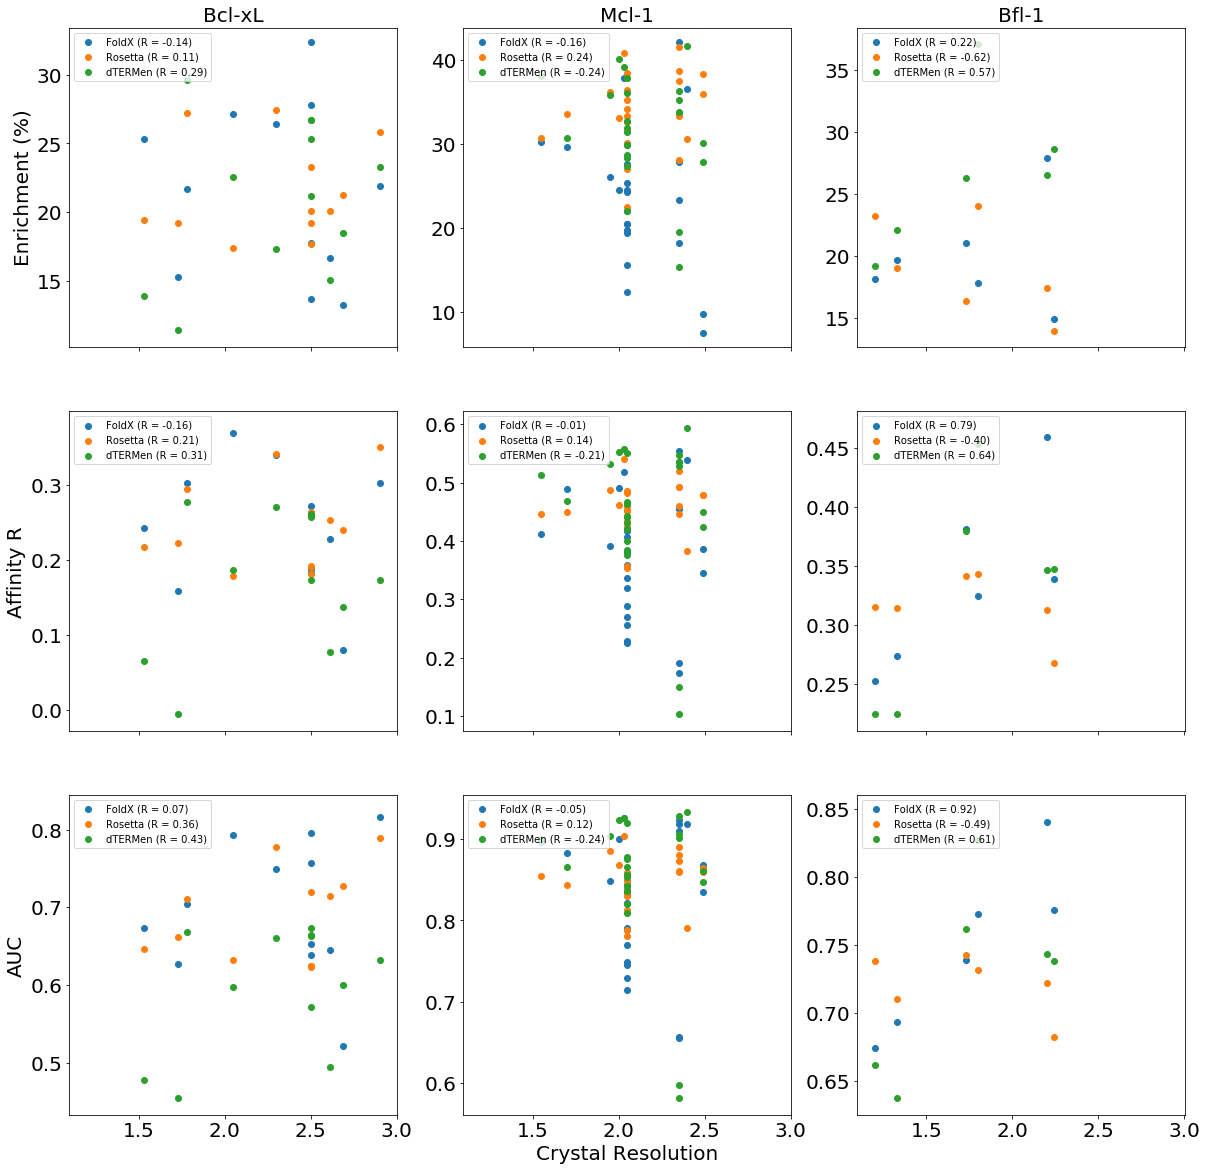

In [23]:
figsize(20,20)
fig, axes = plt.subplots(3, 3,sharex=True)
AllTest = ["Enrich_","Cor_","AUC_"]
for (test,testname) in zip(AllTest,["Enrichment (%)","Affinity R","AUC"]):
    for (recep,rname) in zip(Receps,["Bcl-xL","Mcl-1","Bfl-1"]):
        subdf = AllConcatDF[AllConcatDF["Resolution"] > 0].filter(regex=recep,axis=0)
        naxes = axes[AllTest.index(test),Receps.index(recep)]
        for (t,n) in zip(ModToRun,ModToRunName):
            k = test+t
            res = subdf["Resolution"]
            perf = subdf[k]
            lab = "%s (R = %.2f)" % (n,np.corrcoef(res,perf)[0][1])
            naxes.scatter(res,perf,label=lab)
        naxes.legend(loc=2)
        if test == "Enrich_":
            naxes.set_title(rname,size=20)
        if (rname == "Mcl-1") and (test == "AUC_"):
            naxes.set_xlabel("Crystal Resolution",size=20)
        if rname == "Bcl-xL":
            naxes.set_ylabel(testname,size=20)
        
        naxes.tick_params(labelsize=20)
        #naxes.show()
plt.savefig("../Figures/Supp_perf_vs_res.tiff",format="TIFF",dpi=75)
#AllConcatDF["Resolution"]